In [4]:
library('igraph')
install.packages('readr')
library('readr')

also installing the dependencies ‘hms’, ‘BH’




The downloaded binary packages are in
	/var/folders/b7/grfm49hs3pj1mk3y7stdkdnw0000gn/T//Rtmps7Mahk/downloaded_packages


[1] 0.01444492

[1] 1.190512

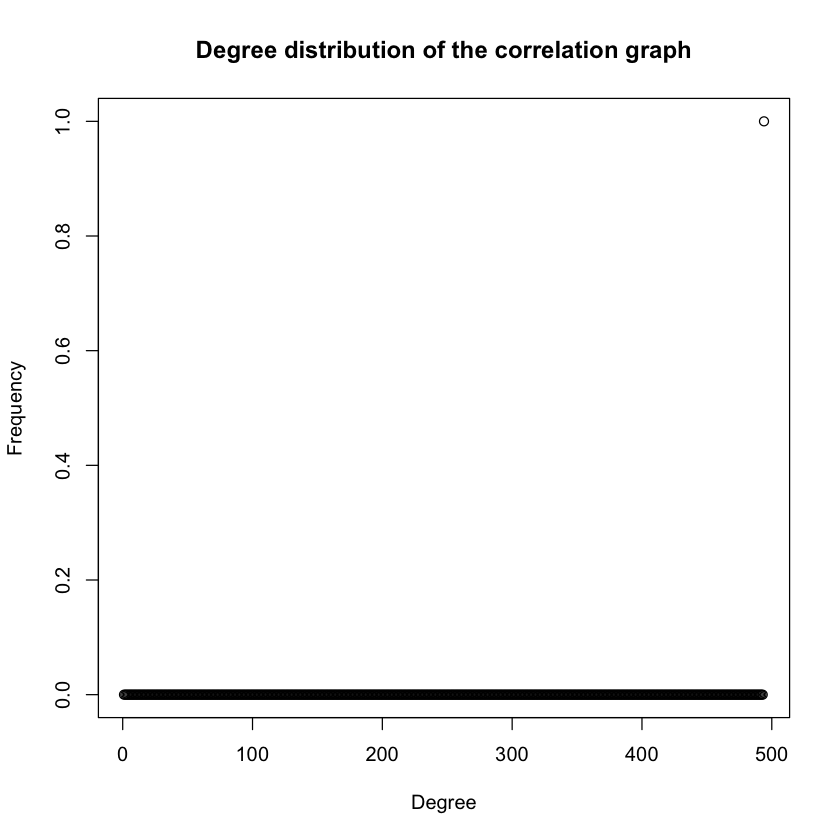

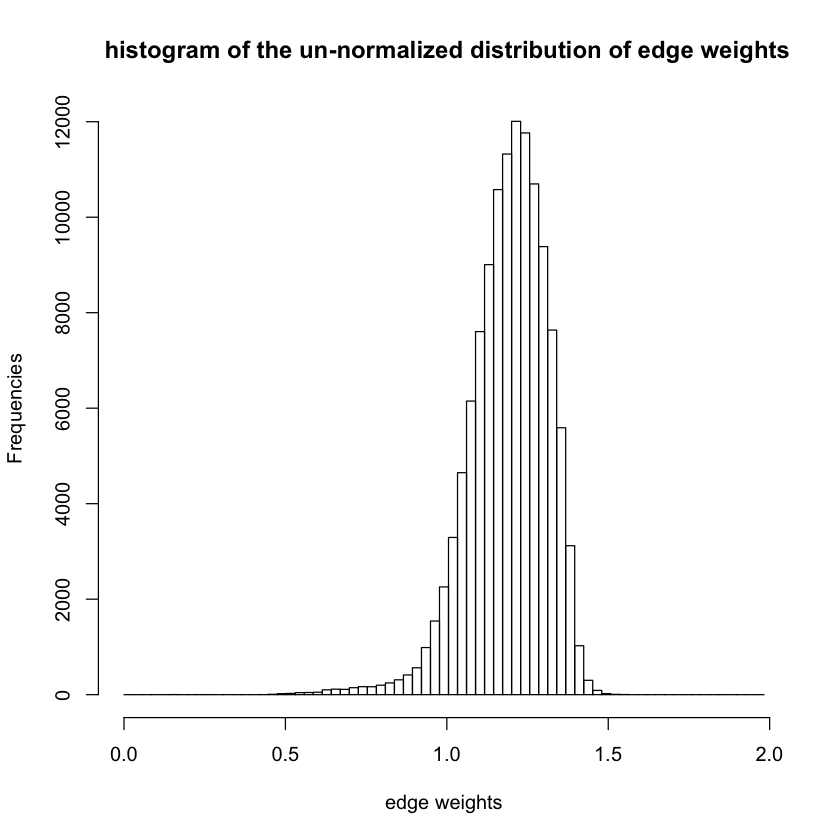

In [57]:
#question2
fname_sector = "/Users/yangyang/Downloads/finance_data/Name_sector.csv"
sector = read.csv(fname_sector,stringsAsFactors = FALSE) 

# construct adjacency matrix D = [dij ]
stock_names = sector$Symbol
r_i_mat = matrix(list(),length(stock_names)-11,2)
P.data <- data.frame(A = character(), B = character(),  C = numeric(), stringsAsFactors=FALSE) 
colnames(P.data) = c("Node_1", "Node_2", "weights")

#loop through each stock name
count = 0
for(i in stock_names) { 
  name = paste('/Users/yangyang/Downloads/finance_data/data/',i,'.csv',sep = "") 
  data_close = read.csv(name,stringsAsFactors = FALSE)$Close 
  if (length(data_close) == 765){
      count = count + 1
      r_i_local = numeric(0) 
      for (j in 2:length(data_close)){
        r_i_local[j-1] = log(data_close[j]) - log(data_close[j-1])  #r_i formula
      }
      r_i_mat[[count,1]] = i
      r_i_mat[[count,2]] = r_i_local
  }
}

for (i in 1: 494){
    if (length(r_i_mat[[i,2]])!=764){
        cat(length(r_i_mat[[i,2]]),'\n')
    }
}

# create correlation graph
edge_count = 0
count = 1
all_w_ijs = numeric()
for(i in 1 : 493) {

  for( j in (i+1) : 494){
    P_i = r_i_mat[[i,2]]
    P_j = r_i_mat[[j,2]]
    edge_count = edge_count + 1
    avg_i = mean(P_i) 
    avg_j = mean(P_j)
    avg2_i = mean(P_i^2) 
    avg2_j = mean(P_j^2)
    P_ij = (mean(P_i*P_j)  - avg_i * avg_j) / sqrt((avg2_i - avg_i^2) * (avg2_j - avg_j^2)) # cross_corelation formula
    w_ij = sqrt(2*(1-P_ij))
    all_w_ijs = c(all_w_ijs , w_ij)
    P.data[edge_count,1] = r_i_mat[[i,1]]
    P.data[edge_count,2] = r_i_mat[[j,1]]
    P.data[edge_count,3] = w_ij
    
  }
}

g1 = graph.data.frame(P.data,directed = FALSE)
plot(degree.distribution(g1),main="Degree distribution of the correlation graph",xlab="Degree",ylab="Frequency")
var(all_w_ijs)
mean(all_w_ijs)
hist( x= all_w_ijs, breaks = seq(from = round(min(all_w_ijs)), to = round(max(all_w_ijs)), by = (max(all_w_ijs)-min(all_w_ijs))/50), 
      main = " histogram of the un-normalized distribution of edge weights", xlab = "edge weights", ylab = "Frequencies")

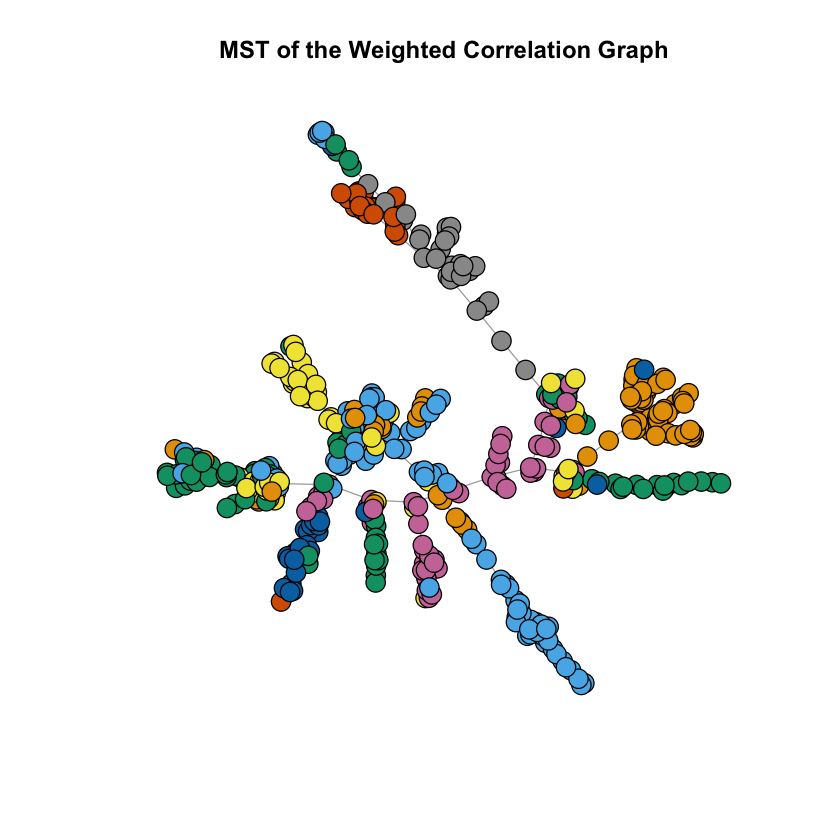

In [54]:
#question 3
nodes = V(g1)$name # create a vector of all nodes
tmp = sector$Sector # create a vector of all sectors 
sectors = character()
for (i in nodes){
    if (length(which(stock_names == i)) == 0){
        cat(i)
    }
    sectors = c(sectors,tmp[which(stock_names == i)])
}
u_sectors = unique(sectors)
colors = rep(0,length(nodes))

#color unique sectors
col_id = 1
for(i in u_sectors){
  colors[which(sectors == i)] = col_id 
  col_id = col_id + 1
}

# create MST
g1_mst = mst(g1 , weights = P.data$weights)
plot(g1_mst, vertex.color = colors ,vertex.size = rep(7,length(nodes)) , vertex.label = NA, 
main = "MST of the Weighted Correlation Graph" )


In [55]:
#question 4
alpha1 = 0
alpha2 = 0

for (i in 1:length(nodes)){
    i_name = nodes[i];
    temp_neigh = as.vector(neighbors(g1_mst , i_name , mode = "all"))
    num_same_sec = length(which(sectors[temp_neigh] == sectors[i]))
    temp_prob = num_same_sec / length(temp_neigh)
    alpha1 = alpha1 + temp_prob
    alpha2 = alpha2 + length(sectors[i])/length(nodes)
}

alpha1 = alpha1/length(nodes)
alpha2 = alpha2/length(nodes)
cat('alpha1: ' , alpha1 , '\n')
cat('alpha2: ' , alpha2 , '\n')

alpha1:  0.8289301 
alpha2:  0.002024291 
